In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [15]:
#%matplotlib widget
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["savefig.format"] = 'pdf'

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import LearningRateScheduler

print(tf.__version__)

2.8.1


In [4]:
#file = r'/Users/rshara01/Desktop/LINAC_STUDY/BEAM STUDY 24MAY2022/devicescan.csv'
#file = r'/Users/rshara01/Desktop/LINAC_STUDY/BEAM STUDY 15JUNE2022/devicescan_3ph_jun15.csv'
file = r'/Users/rshara01/Desktop/LINAC_STUDY/LINAC STUDY 06282021/devicescan_RFQ.csv'
dataset = pd.read_csv(file)
dataset = dataset.dropna()
dataset.columns = dataset.columns.str.replace("[()]", "_",regex=True)
#dataset.tail()

In [6]:
#cols = list(dataset.filter(regex='D|RFQPAH_S|RFBPAH_S|V5QSET_S'))
cols = list(dataset.filter(regex='RFQPAH_S|RFBPAH_S|V5QSET_S|TO|LM'))
subset = dataset.copy()
subset = subset[cols]
subset.drop(list(subset.filter(regex=r'Time|\.1|BIH|DEL|DRQ|SSD|CD|AD|GR|DEB')),axis=1, inplace=True)

rfq = np.median(subset['L:RFQPAH_S_'])
'''
rfb = np.median(subset['L:RFBPAH_S_'])
v5q = np.median(subset['L:V5QSET_S_'])
print(rfq,rfb,v5q)

subset1 = subset.loc[(np.abs(subset['L:RFQPAH_S_']-rfq)<0.5) & (np.abs(subset['L:RFBPAH_S_']-rfb)<0.5)]
subset1 = subset1.dropna()
subset2 = subset.loc[(np.abs(subset['L:RFQPAH_S_']-rfq)<0.5) & (np.abs(subset['L:V5QSET_S_']-v5q)<0.1)]
subset2 = subset2.dropna()
subset3 = subset.loc[(np.abs(subset['L:RFBPAH_S_']-rfb)<0.5) & (np.abs(subset['L:V5QSET_S_']-v5q)<0.1)]
subset3 = subset3.dropna()
'''
subset3 = subset
losscol = [col for col in list(subset3.columns) if col.find('LM')!=-1]
subset3['L:D7LMSM_R_']=subset3[losscol].sum(axis=1)
subset3['L:D7LMSM_R_']

0       9.307861
1       9.307861
2      11.361694
3      10.015869
4      10.076904
         ...    
615     7.693481
616     8.190918
617     8.108521
618     6.936646
619     8.340454
Name: L:D7LMSM_R_, Length: 620, dtype: float64

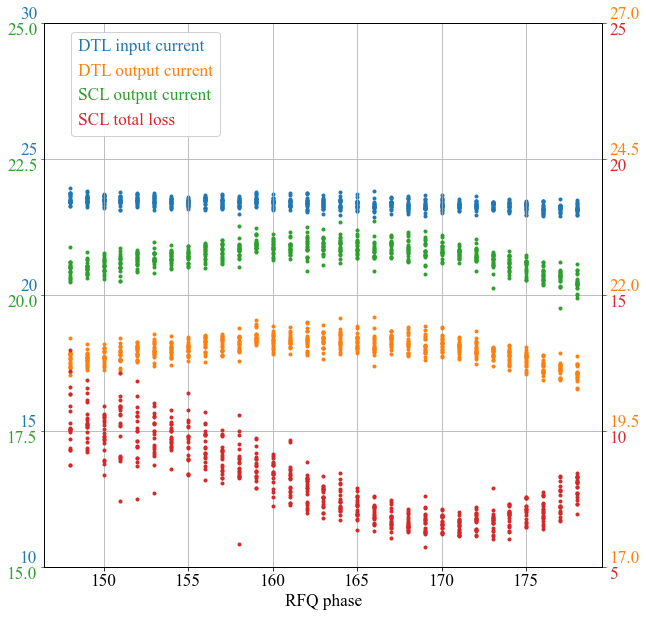

In [14]:
%matplotlib inline
from matplotlib.figure import Figure
import matplotlib.ticker as mt
#sns.pairplot(subset2, vars=['L:V5QSET_S_','L:D34BPH_R_','L:D34BPV_R_','L:D34BF_R_','L:D64BPH_R_','L:D64BPV_R_','L:D64BF_R_'], palette='hls',diag_kind='kde',diag_kws={'alpha':0.9},height=2)
#plt.scatter(subset2['L:RFBPAH_S_'],subset2['L:D7LMSM_R_'])

ylist=['L:TO1IN_R_','L:TO5OUT_R_','L:D7TOR_R_','L:D7LMSM_R_']
lbl = ['DTL input current', 'DTL output current', 'SCL output current', 'SCL total loss']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
plt.rcParams["axes.titlelocation"] = 'right'

lims = [[10,30],[17,27],[15,25],[5,25]]

fig = plt.figure(figsize=(10,10))
p = [None]*len(ylist)
ax = [None]*len(ylist)
ax[0] = fig.add_subplot(111)
ax[0].xaxis.grid(True, which='major')
ax[0].yaxis.grid(True, which='major')
ax[0].set_xlabel('RFQ phase', fontsize='xx-large')
for i in range(1,len(ylist)):
    ax[i] = ax[0].twinx()
for i,yd in enumerate(ylist):
    space= space + '  '*(len(yd)+1) if i>0 else ' '
    col=colors[i]
    #ax[i].set_title(yd+space,color=col,ha='right',fontsize='xx-large')                                
    ax[i].tick_params(axis='y', colors=col,rotation=0)
    ax[i].tick_params(axis='both',labelsize='xx-large')
    p[i] = ax[i].scatter(subset3['L:RFQPAH_S_'],subset3[yd],c=col,marker='.',linestyle='None', label=lbl[i])
    ax[i].yaxis.set_major_locator(mt.LinearLocator(5))
    ax[i].set_ylim(lims[i])
    
    
    if i%2==0:
        ax[i].yaxis.tick_left()
        for yl in ax[i].get_yticklabels():
            #yl.set_x( -0.045*(i/2.) )
            if i==0:
                yl.set(verticalalignment='bottom')
            else:
                yl.set(verticalalignment='top')
                    
    else:
        ax[i].yaxis.tick_right()
        for yl in ax[i].get_yticklabels():
            #yl.set_x( 1.0+0.075*(i-1)/2.)
            if i==1:
                yl.set(verticalalignment='bottom')
            else:
                yl.set(verticalalignment='top')
                
leg=fig.legend(handles = p,loc = 'upper left', bbox_to_anchor=(0.15, 0.88),fontsize='xx-large',fancybox=True, framealpha=0.9, handlelength=0, handletextpad=0)
for h, t in zip(leg.legendHandles, leg.get_texts()):
    h.set_visible(False)
    t.set_color(h.get_facecolor()[0])

plt.show()
fig.savefig('rfq_1Dscan.pdf')

In [40]:
#fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches

fig = Figure(figsize=(10,10))
ax = [None]*len(ylist)
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
    
host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)
    
host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot([0, 1, 2], [0, 1, 2],    color=color1, label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2],    color=color2, label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], color=color3, label="Velocity")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

# no x-ticks                 
par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Adjust spacings w.r.t. figsize
fig.tight_layout()
fig.canvas.draw()

In [95]:
dfs = []
labels = []
#for i in range(0,6):
#    dfs.append(subset1.loc[np.abs(subset1['L:V5QSET_S_']-(v5q+0.4*i))<0.1].mean())
#    labels.append('%s'%round(v5q+0.4*i,2))

for i in range(-5,1):
    dfs.append(subset2.loc[np.abs(subset2['L:RFBPAH_S_']-(rfb+2.0*i))<0.5].mean())
    labels.append('%s'%round(rfb+2.0*i,2))

#for i in range(-5,6):
#    dfs.append(subset3.loc[np.abs(subset3['L:RFQPAH_S_']-(rfq+4.0*i))<0.5].mean())
#    labels.append('%s'%round(rfq+4.0*i,2))



dfs = [(df-dfs[5]) for df in dfs]


bf = [key for key in list(dfs[0].keys()) if key.find('BF')!=-1]
bph = [key for key in list(dfs[0].keys()) if key.find('BPH')!=-1] 
bpv = [key for key in list(dfs[0].keys()) if key.find('BPV')!=-1] 
blm = [key for key in list(dfs[0].keys()) if key.find('LM')!=-1 and key.find('SM')==-1] 



In [96]:
dft5 = pd.concat(dfs,axis=1)
#dft5 = dft5.transpose()
dft5.index = dft5.index.str.replace("_R_ | _S_", "",regex=True)
dft5.to_csv('27052022-rfb.csv')


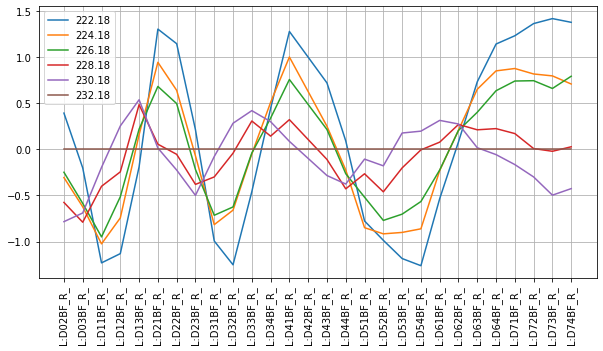

In [97]:
#%matplotlib widget

for i,df in enumerate(dfs):
    idx = [j for j,key in enumerate(bf) if np.abs(df[key])<7 and key.find('42')==-1]
    data = [df[bf[j]] for j in idx]
    plt.plot(idx,data, label=labels[i])

plt.xticks(np.linspace(0,len(bf), len(bf), endpoint=False), bf, rotation=90)
plt.grid()
plt.legend()
plt.show()

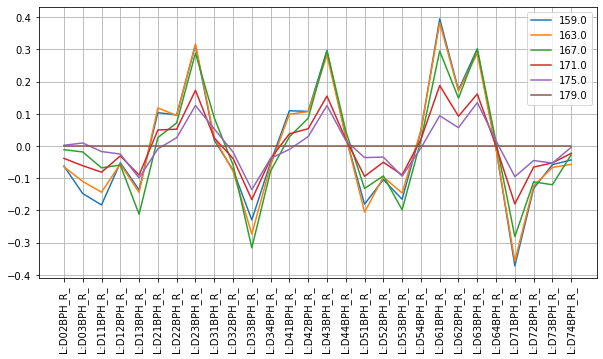

In [90]:
plt.close()
for i,df in enumerate(dfs):
    idx = [j for j,key in enumerate(bph) if np.abs(df[key])<7 ]
    data = [df[bph[j]] for j in idx]
    plt.plot(idx,data, label=labels[i])

plt.xticks(np.linspace(0,len(bph), len(bph), endpoint=False), bph, rotation=90)
plt.grid()
plt.legend()
plt.show()

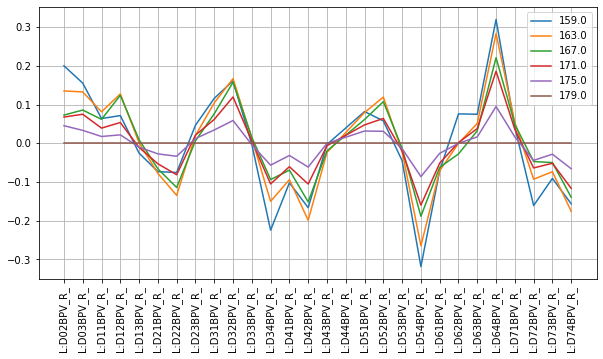

In [91]:
plt.close()
for i,df in enumerate(dfs):
    idx = [j for j,key in enumerate(bpv) if np.abs(df[key])<7 and key.find('44')==-1]
    data = [df[bpv[j]] for j in idx]
    plt.plot(idx,data, label=labels[i])

plt.xticks(np.linspace(0,len(bpv), len(bpv), endpoint=False), bpv, rotation=90)
plt.grid()
plt.legend()
plt.show()

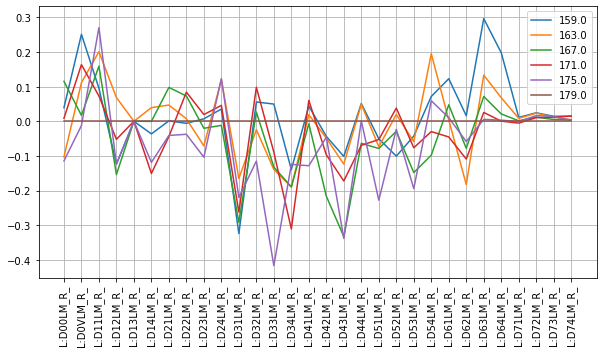

In [92]:
plt.close()
for i,df in enumerate(dfs):
    idx = [j for j,key in enumerate(blm) if np.abs(df[key])<10]
    data = [df[blm[j]] for j in idx]
    plt.plot(idx,data, label=labels[i])

plt.xticks(np.linspace(0,len(blm), len(blm), endpoint=False), blm, rotation=90)
plt.grid()
plt.legend()
plt.show()